# Clustering

1. KMeans
    - How to compare different clusterings
    - How to select k
    - When KMeans fails
2. Hierarchical clustering

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Let's start by creating a simple, 2-dimensional, synthetic dataset:

In [2]:
from sklearn.datasets import make_blobs
random_state = 42

X, y = make_blobs(random_state=random_state)
print(X.shape, y)

(100, 2) [2 1 0 1 2 1 0 1 1 0 0 2 2 0 0 2 2 0 2 2 0 2 2 0 0 0 1 2 2 2 2 1 1 2 0 0 0
 0 1 1 2 0 1 0 0 1 2 2 2 1 1 1 0 2 2 2 0 0 1 0 2 1 2 1 2 2 1 2 1 1 1 2 2 0
 1 2 1 2 1 1 0 1 0 2 0 0 0 1 0 1 1 1 0 1 0 0 0 1 2 0]


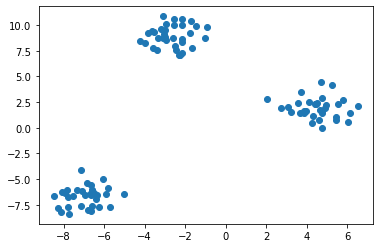

In [3]:
plt.scatter(X[:, 0], X[:, 1]);

* In the scatter plot above, we can see three separate groups of data points and we would like to recover them using clustering.
* Think of "discovering" the class labels that we already take for granted in a classification task.
* Even if the groups are obvious in the data, it is hard to find them when the data lives in a high-dimensional space, which we can't visualize in a single histogram or scatterplot.

# K-means


In [4]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=random_state)
kmeans.fit(X)
labels = kmeans.predict(X)
print(labels)

[1 0 2 0 1 0 2 0 0 2 2 1 1 2 2 1 1 2 1 1 2 1 1 2 2 2 0 1 1 1 1 0 0 1 2 2 2
 2 0 0 1 2 0 2 2 0 1 1 1 0 0 0 2 1 1 1 2 2 0 2 1 0 1 0 1 1 0 1 0 0 0 1 1 2
 0 1 0 1 0 0 2 0 2 1 2 2 2 0 2 0 0 0 2 0 2 2 2 0 1 2]


Let's visualize the assignments that have been found

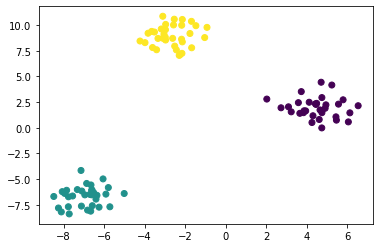

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=labels);

Compared to the true labels:

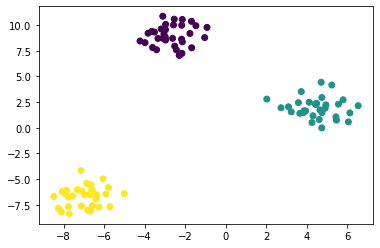

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y);

* Here, we are probably satisfied with the clustering results.
* But in general we might want to have a more quantitative evaluation.
* How about comparing our cluster labels with the ground truth we got when generating the blobs?

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score

print('Accuracy score:', accuracy_score(y, labels))
print(confusion_matrix(y, labels))

Accuracy score: 0.0
[[ 0  0 34]
 [33  0  0]
 [ 0 33  0]]


In [8]:
np.mean(y == labels)

0.0

* Even though we recovered the partitioning of the data into clusters perfectly, the cluster IDs we assigned were arbitrary, and we can not hope to recover them.
* Therefore, we must use a different scoring metric, such as ``adjusted_rand_score``, which is invariant to permutations of the labels:

In [9]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(y, labels)

# Instead of comparing object labels, ARI compares all pairs of objects

1.0

* One of the "short-comings" of K-means is that we have to specify the number of clusters, which we often don't know *apriori*.
* For example, let's have a look what happens if we set the number of clusters to 2 in our synthetic 3-blob dataset:

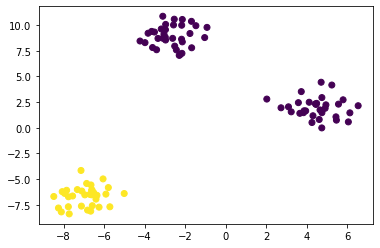

In [10]:
kmeans = KMeans(n_clusters=2, random_state=random_state)
labels = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels);

## The Elbow Method

* The Elbow method is a "rule-of-thumb" approach to finding the optimal number of clusters.
* Here, we look at the cluster dispersion for different values of k:

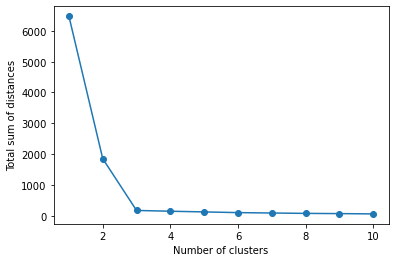

In [11]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Total sum of distances');

Then, we pick the value that resembles the "pit of an elbow." As we can see, this would be k=3 in this case, which makes sense given our visual expection of the dataset previously.

**Clustering comes with assumptions**:
* A clustering algorithm finds clusters by making assumptions with samples should be grouped together.
* Each algorithm makes different assumptions and the quality and interpretability of your results will depend on whether the assumptions are satisfied for your goal.
* For K-means clustering, the model is that all clusters have equal, spherical variance.

**In general, there is no guarantee that structure found by a clustering algorithm has anything to do with what you were interested in**.


# When KMeans fails

### Different variance

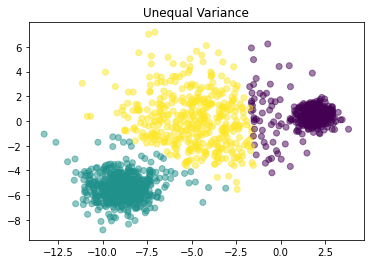

In [12]:
n_samples = 1500
random_state = 170

X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)

kmeans = KMeans(n_clusters=3, random_state=random_state)

labels = kmeans.fit_predict(X_varied)


plt.scatter(X_varied[:, 0], X_varied[:, 1], c=labels, alpha=.5);
plt.title("Unequal Variance");


### Unevenly sized blobs

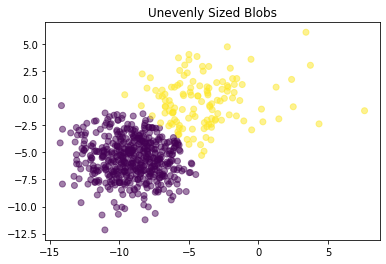

In [13]:
X, y = make_blobs(n_samples=n_samples,
                  cluster_std=[2.0, 2.0, 2.0],
                  random_state=random_state)
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))

kmeans = KMeans(n_clusters=2, random_state=random_state)

labels = kmeans.fit_predict(X_filtered)


plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=labels, alpha=0.5);
plt.title("Unevenly Sized Blobs");


### Anisotropically distributed data

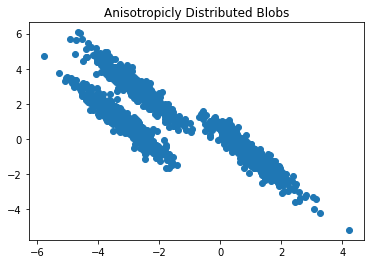

In [14]:
X, y = make_blobs(n_samples=n_samples, cluster_std=[1.0, 1.0, 1.0], random_state=random_state)

transformation = [[ 0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

plt.scatter(X_aniso[:, 0], X_aniso[:, 1]);
plt.title("Anisotropicly Distributed Blobs");

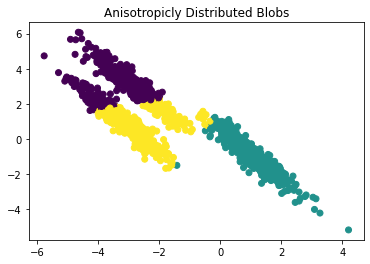

In [15]:
kmeans = KMeans(n_clusters=3, random_state=random_state)

labels = kmeans.fit_predict(X_aniso)

plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=labels);
plt.title("Anisotropicly Distributed Blobs");

# Hierarchical Clustering

* One nice feature of hierachical clustering is that we can visualize the results as a dendrogram, a hierachical tree.
* Using the visualization, we can then decide how "deep" we want to cluster the dataset by setting a "depth" threshold
* Or in other words, we don't need to make a decision about the number of clusters upfront.


## Agglomerative and divisive hierarchical clustering

* Furthermore, we can distinguish between 2 main approaches to hierarchical clustering: Divisive clustering and agglomerative clustering.
* In agglomerative clustering, we start with a single sample from our dataset and iteratively merge it with other samples to form clusters - we can see it as a bottom-up approach for building the clustering dendrogram.  
* In divisive clustering, however, we start with the whole dataset as one cluster, and we iteratively split it into smaller subclusters - a top-down approach.  

In this notebook, we will use **agglomerative** clustering.

### Single and complete linkage

![single-complete](clustering-linkage.png)

* Now, the next question is how we measure the similarity between samples.
* One approach is the familiar Euclidean distance metric that we already used via the K-Means algorithm. 
* As a refresher, the distance between 2 m-dimensional vectors $\mathbf{p}$ and $\mathbf{q}$ can be computed as:

\begin{align} \mathrm{d}(\mathbf{q},\mathbf{p}) & = \sqrt{(q_1-p_1)^2 + (q_2-p_2)^2 + \cdots + (q_m-p_m)^2} \\[8pt]
& = \sqrt{\sum_{j=1}^m (q_j-p_j)^2}.\end{align}	

* However, that's the distance between 2 samples.
* Now, how do we compute the similarity between subclusters of samples?
* I.e., our goal is to iteratively merge the most similar pairs of clusters until only one big cluster remains.
* There are many different approaches to this, for example single and complete linkage.

* In single linkage, we take the pair of the most similar samples (based on the Euclidean distance, for example) in each cluster, and merge the two clusters which have the most similar 2 members into one new, bigger cluster.
* In complete linkage, we compare the pairs of the two most dissimilar members of each cluster with each other, and we merge the 2 clusters where the distance between its 2 most dissimilar members is smallest.

![](figures/clustering-linkage.png)

In [16]:
from sklearn import datasets

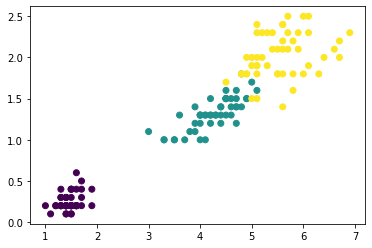

In [17]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
n_samples, n_features = X.shape

plt.scatter(X[:, 0], X[:, 1], c=y);

In [18]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

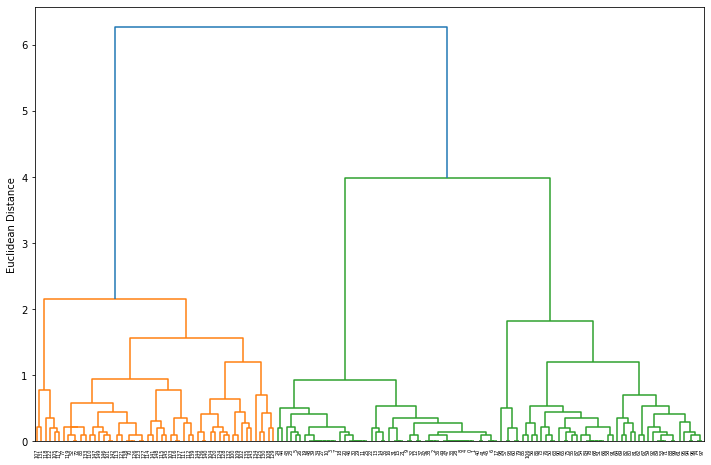

In [19]:
clusters = linkage(X, metric='euclidean', method='complete')
fig, ax = plt.subplots(1,1, figsize=(12,8))
dendr = dendrogram(clusters, ax=ax)

plt.ylabel('Euclidean Distance');

In [20]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3,
                             affinity='euclidean',
                             linkage='complete')

prediction = ac.fit_predict(X)
print('Cluster labels: %s\n' % prediction)

Cluster labels: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]



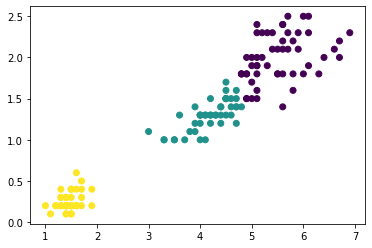

In [21]:
plt.scatter(X[:, 0], X[:, 1], c=prediction);